# **Task 3**

***Contains solutions for both part A and B***
***
By : [Naimish Mani B](https://www.github.com/Naimish240)
***


# **Table Of Contents**

* [Preface](#pre)
* [Setup](#set)
* [Understanding  the dataset](#vis)
  - [Plot all Columns](#all)
  - [Correlation Matrix](#corr)
  - [Pair Plot Analysis](#ppa)
* [Classification](#class) { Part A }
  - [Logistic Regression](#reg)
  - [K Nearest Neighbours](#knn)
  - [Decision Tree](#dt)
  - [Random Forest](#rf)
  - [Naive Bayes Classifier](#nb)
  - [Multi Layer Perceptron](#mlp)
  - [AdaBoost](#ada)
  - [Conclusion](#sum)
  - [Future Work](#fut)
* [Dimensionality Reduction](#rdn) { Part B }
  - [Principal Component Analysis](#pca)
  - [Neural Auto Encoder](#nae)
  - [Future Work](#fut1)
* [Concluding thoughts](#conc)
***



# **Preface** <a class="anchor" id="pre"></a>

Initially, after extracting the dataset, I realised that I don't have enough memory to load the entire dataset. Hence, in an attempt to circumvent this issue, I ended up implementing my own generator to yield the data one line at a time, and also wrote my own classifiers to work with this method. 

There were a couple of issues with this approach, though. For one, it loads elements into memory sequentially. This is a problem wherever we use batches, because we cannot gurantee there being a good, uniform split of elements from each class in the batch. This might lead to accuracy issues. But it can be mitigated by performing random access on the file, by maybe using seek() to read a specific line in the file, and then randomly reading the lines to make the training set. This might ensure uniformity across batches. But, not all algorithms work on batches. And since I was implementing them on my own, there's more scope for failure here.

So instead, I ended up using Colab for this task, after getting permission to do so from Shravan Chaudhrai.

**NOTE:** 

*There were times when the notebook got disconnected due to internet stability issues. In those instances, I let the initial "Understanding the Dataset" code stay in it's prior state without re-running the cells, because those plots and values are constant for the dataset.*

## **Libraries Used**
- Pandas
- Seaborn
- Matplotlib
- Scikit-Learn
- NumPy
- Time

# **Setup**  <a class="anchor" id="set"></a>

We start off by downloading the dataset using 'gdown', and then extracting it with gzip. After verifying that the datsaet has been extracted properly, we can now work on understanding the dataset.

In [1]:
# Run this to figure out where to restart from each time instance crashes.
!ls

HIGGS_6M.csv  sample_data


In [1]:
# Download the dataset
!gdown --id 1Nl-RU5HggCSWWqINN4gbxHAVzER6T2Po

# Extract it
!gzip -d /content/HIGGS_6M.csv.gz

# Verify if dataset is there
!ls

# Try reading a line from it
with open('HIGGS_6M.csv', 'r') as fh:
  print(fh.readline())

Downloading...
From: https://drive.google.com/uc?id=1Nl-RU5HggCSWWqINN4gbxHAVzER6T2Po
To: /content/HIGGS_6M.csv.gz
1.56GB [00:10, 142MB/s]
HIGGS_6M.csv  sample_data
1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,-6.536741852760314941e-01,9.303491115570068359e-01,1.107436060905456543e+00,1.138904333114624023e+00,-1.578198313713073730e+00,-1.046985387802124023e+00,0.000000000000000000e+00,6.579295396804809570e-01,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01



# **Understanding the Dataset** <a class="anchor" id="vis"></a>

Now that we've downloaded the dataset, our next task is to load it. For that, we'll be using Pandas. We'll also be visualising various features of the dataset too, using seaborn. So let's import the required libraries first.

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Loads the dataframe
df = pd.read_csv("HIGGS_6M.csv", header=None)

df.head()

0         1         2         3   ...        25        26        27        28
0  1.0  0.869293 -0.635082  0.225690  ...  0.920005  0.721657  0.988751  0.876678
1  1.0  0.907542  0.329147  0.359412  ...  0.978098  0.779732  0.992356  0.798343
2  1.0  0.798835  1.470639 -1.635975  ...  0.951331  0.803252  0.865924  0.780118
3  0.0  1.344385 -0.876626  0.935913  ...  0.728281  0.869200  1.026736  0.957904
4  1.0  1.105009  0.321356  1.522401  ...  0.838085  1.133295  0.872245  0.808487

[5 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 29 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
 12  12      float64
 13  13      float64
 14  14      float64
 15  15      float64
 16  16      float64
 17  17      float64
 18  18      float64
 19  19      float64
 20  20      float64
 21  21      float64
 22  22      float64
 23  23      float64
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
dtypes: float64(29)
memory usage: 1.3 GB


Now, let's see what the range of the columns in the dataset are.

In [ ]:
df.describe().T

count      mean       std  ...       50%       75%        max
0   6000000.0  0.529724  0.499116  ...  1.000000  1.000000   1.000000
1   6000000.0  0.991139  0.564896  ...  0.853188  1.236043  10.396014
2   6000000.0 -0.000006  1.008915  ...  0.000920  0.738214   2.434868
3   6000000.0  0.000363  1.006282  ...  0.000971  0.870994   1.743236
4   6000000.0  0.998190  0.599945  ...  0.891350  1.292679  15.396821
5   6000000.0  0.000032  1.006247  ...  0.000378  0.871482   1.743257
6   6000000.0  0.990886  0.475080  ...  0.894636  1.170740   8.848616
7   6000000.0 -0.000536  1.009190  ... -0.001016  0.686204   2.969674
8   6000000.0 -0.000089  1.005880  ... -0.000496  0.868313   1.741454
9   6000000.0  1.000497  1.027797  ...  1.086538  2.173076   2.173076
10  6000000.0  0.992473  0.500014  ...  0.889886  1.201749  11.647081
11  6000000.0  0.000372  1.009539  ...  0.000060  0.695564   2.913210
12  6000000.0 -0.000203  1.006107  ... -0.000203  0.869318   1.743175
13  6000000.0  0.999499  1.049401  ...  0.000000  2.214872   2.214872
14  6000000.0  0.992142  0.487452  ...  0.897249  1.221447  11.423817
15  6000000.0  0.000128  1.008500  ...  0.000173  0.700154   2.730009
16  6000000.0 -0.000210  1.006410  ... -0.000197  0.871395   1.742884
17  6000000.0  1.000315  1.193803  ...  0.000000  2.548224   2.548224
18  6000000.0  0.985946  0.505809  ...  0.867990  1.220930  12.882567
19  6000000.0  0.000055  1.007736  ...  0.000372  0.714102   2.498009
20  6000000.0  0.000010  1.006360  ... -0.000264  0.871051   1.743372
21  6000000.0  0.999507  1.400049  ...  0.000000  3.101961   3.101961
22  6000000.0  1.034293  0.673313  ...  0.894954  1.024868  31.076191
23  6000000.0  1.024772  0.380471  ...  0.950652  1.083482  15.637859
24  6000000.0  1.050405  0.164043  ...  0.989775  1.020313   7.992739
25  6000000.0  1.009734  0.397441  ...  0.916531  1.142169  14.262439
26  6000000.0  0.973029  0.525559  ...  0.873443  1.138591  17.762852
27  6000000.0  1.033050  0.365336  ...  0.947368  1.140515   8.779915
28  6000000.0  0.959765  0.313336  ...  0.871874  1.059126   6.966903

[29 rows x 8 columns]

Now that we have a rough understanding of the range of the dataset, the next step is to see the variation within each column in the dataset. That has been plotted below.

## **Plot all columns** <a class="anchor" id="all"></a>

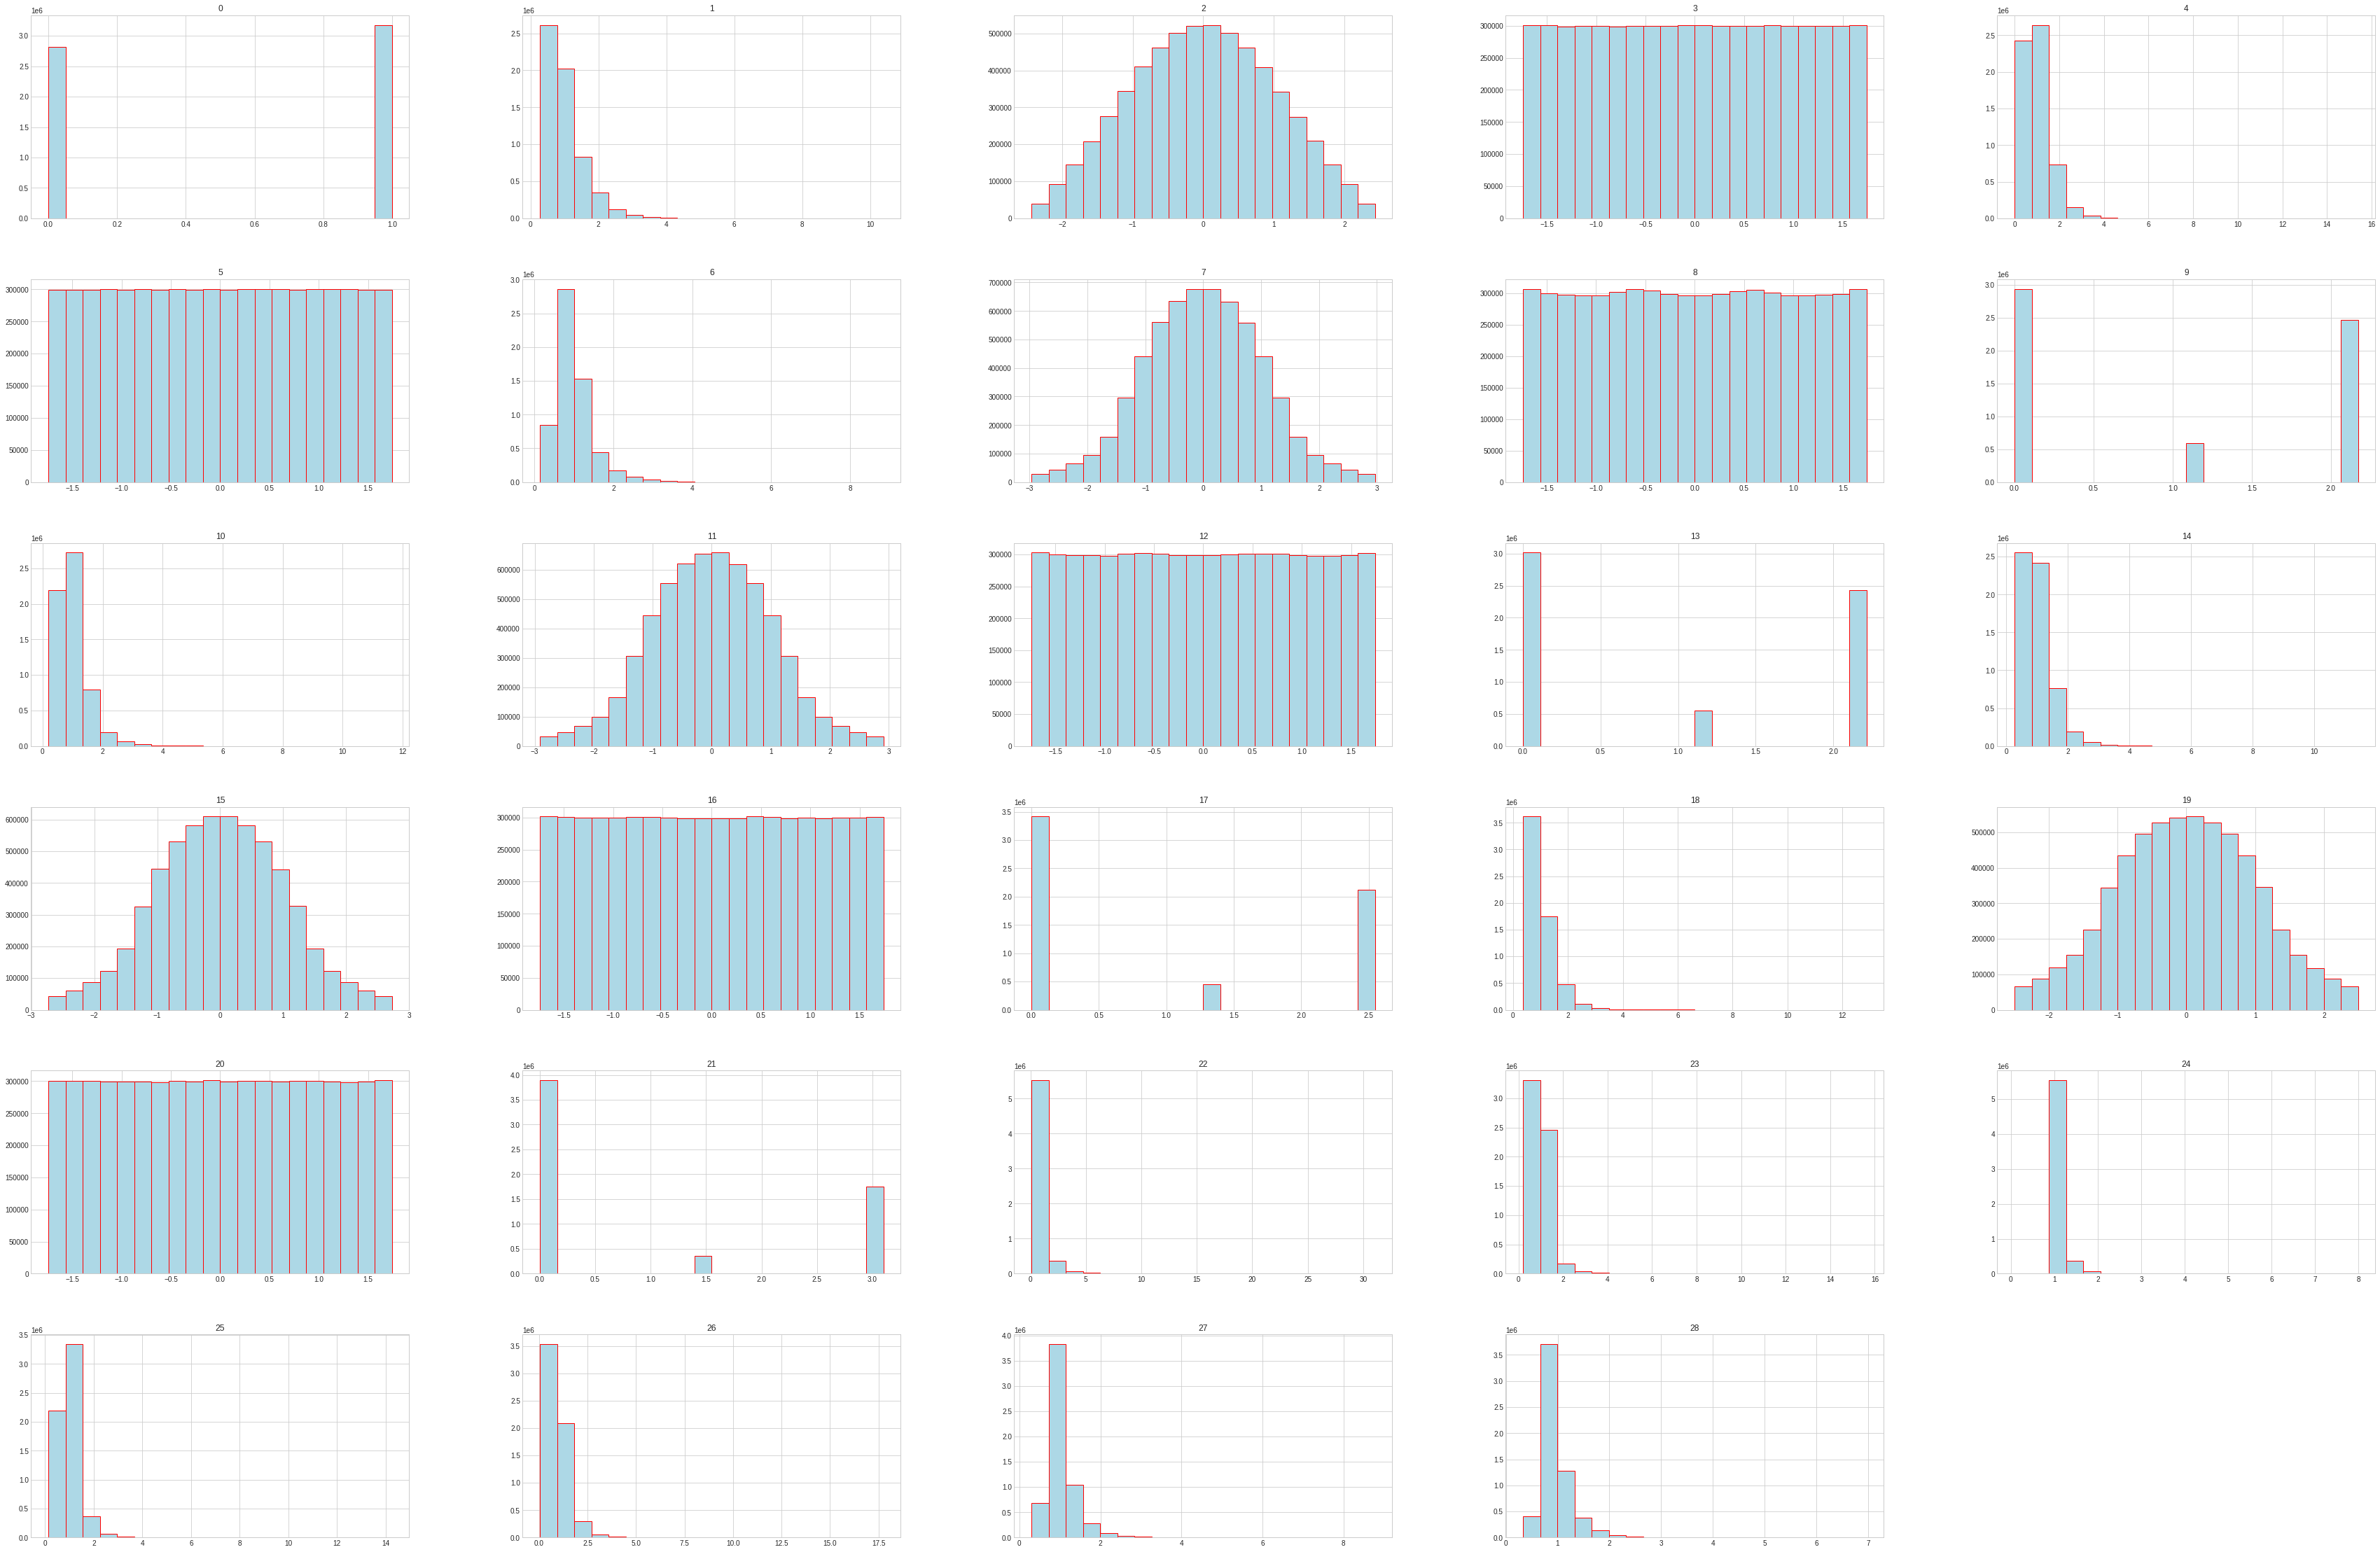

In [ ]:
plt.style.use('seaborn-whitegrid')

# Plot all in same plot
df.hist(bins=20, figsize=(60, 40), color='lightblue', edgecolor = 'red')
plt.show()

From the above plots, we can see clearly that some columns follow a binomial distribution, some follow a normal distribution and others a gaussian distribution. There are also some columns which seem to have just three distinct values (9, 13, 17 and 21). Next, let's see the correlation coefficients between all columns through a correlation matrix. 

For good measure, we'll also calculate the skewness of the columns down below.

In [ ]:
skewValue = df.skew()
print("skewValue of dataframe attributes: ", skewValue)

skewValue of dataframe attributes:  0    -0.119107
1     1.750431
2    -0.000024
3    -0.000612
4     1.491011
5    -0.001000
6     1.906270
7     0.000307
8     0.000359
9     0.158172
10    1.973255
11    0.000865
12    0.000418
13    0.195109
14    1.702261
15   -0.001123
16    0.000909
17    0.438865
18    1.723900
19   -0.000511
20    0.000227
21    0.759401
22    6.462415
23    4.969472
24    4.581439
25    2.853695
26    2.433943
27    2.690596
28    2.547707
dtype: float64


## **Draw Correlation Matrix** <a class="anchor" id="corr"></a>

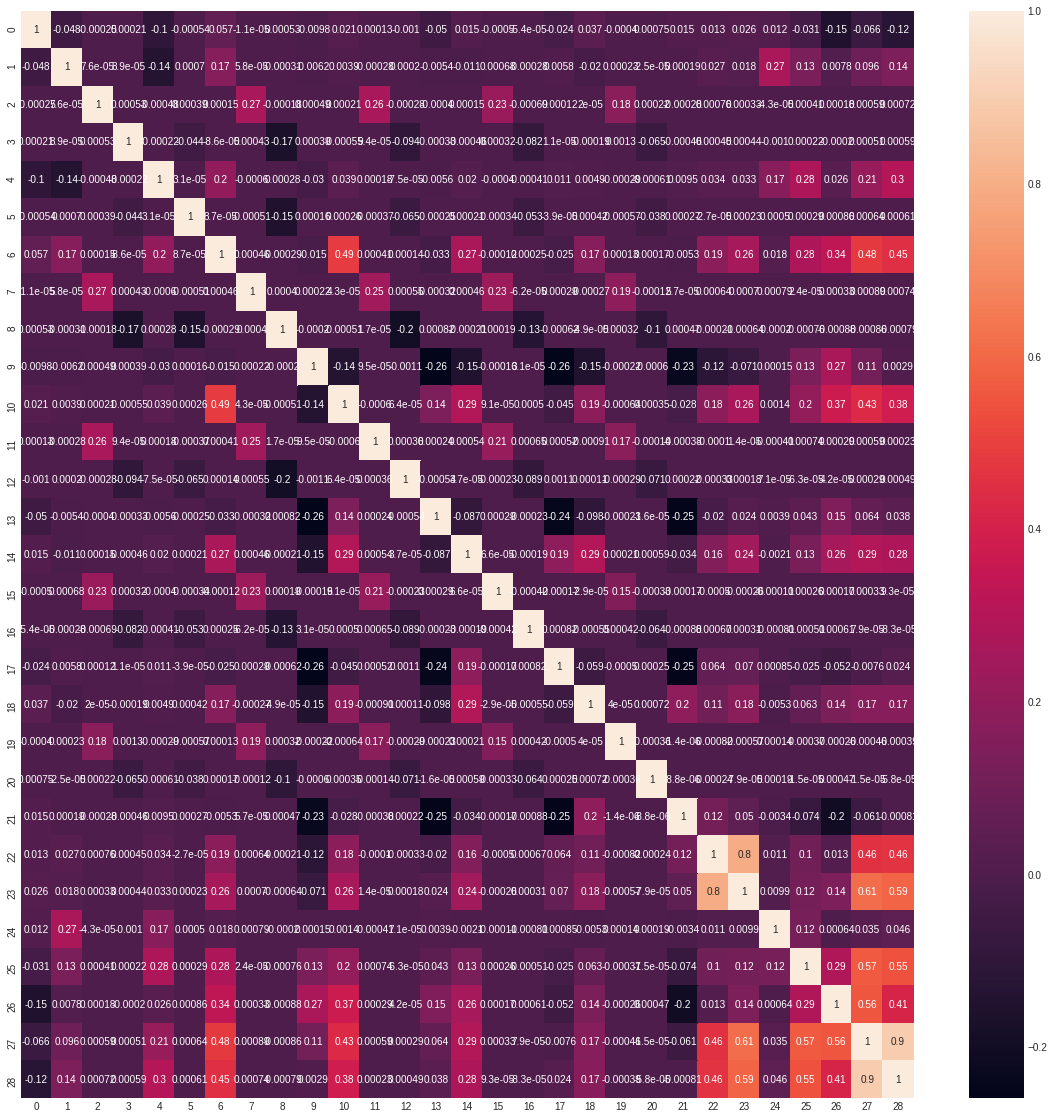

In [ ]:
corrMatrix = df.corr()

plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)
plt.show()

From the correlation matrix, it becomes very clear that almost all of the original features generated (the first 22 columns) are clearly independent of eachother. This implies that we'll have to use AutoEncoders for dimensionality reduction, and traditional techniques might not offer much of a solution.


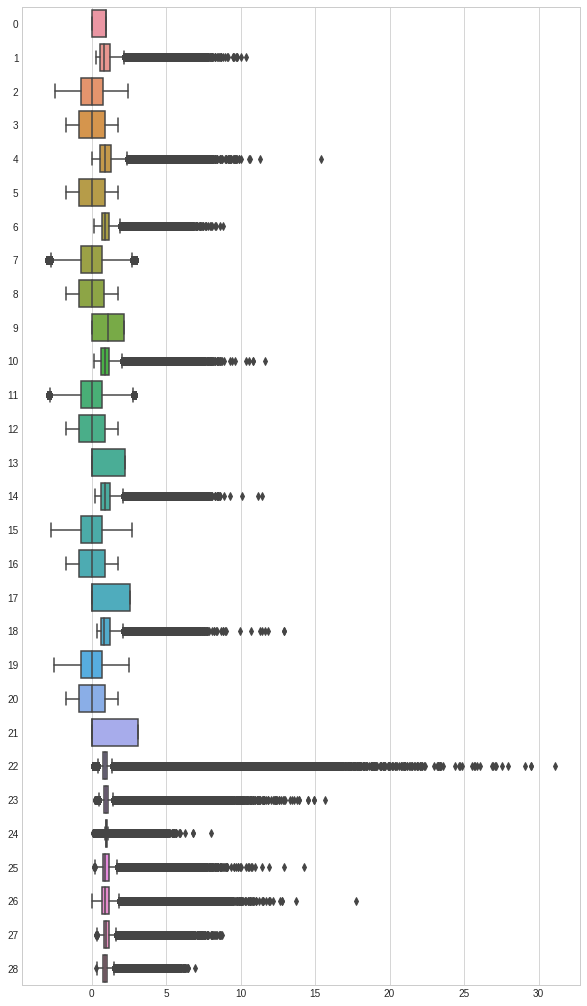

In [ ]:
plt.figure(figsize=(10, 18))
ax = sn.boxplot(data=df, orient='h')

## **Pair Plot Analysis** <a class="anchor" id="ppa"></a>

To identify the kind of classifiers and dimensionality reduction techniques that would be best suited for the dataset, we can perform pair-plot analysis on the dataset.

But the dataset has 6M rows, which is alot. But from the above plots, it is quite apparant that the columns tend to follow typical distributions (Gaussian, Normal and Binomial) to the t. This means that we can sample a relatively small subset for further tasks, without suffering from too much a loss in terms of accuracy.

So, from the 6M rows, we randomly sample 120k rows to make a 'small' version of the dataset. This small dataset is then split into :

  - 100k rows  (training data)
  - 20k rows  (testing data)

Also, we drop the generated final 7 rows from the dataset for now, and only work with the essential data.

In [4]:
# Randomly Sample 120k rows
shortData = df.sample(120000)
# Drop final 7 columns
shortData = shortData.drop(shortData.columns[28],axis=1)
shortData = shortData.drop(shortData.columns[27],axis=1)
shortData = shortData.drop(shortData.columns[26],axis=1)
shortData = shortData.drop(shortData.columns[25],axis=1)
shortData = shortData.drop(shortData.columns[24],axis=1)
shortData = shortData.drop(shortData.columns[23],axis=1)
shortData = shortData.drop(shortData.columns[22],axis=1)

# Print DF shape
print(shortData.shape)

# Show first five rows of sample data
shortData.head()


(120000, 22)


0         1         2   ...        19        20        21
1814828  0.0  0.458072 -0.248416  ...  0.721597 -1.312634  0.000000
2118867  0.0  0.370593  0.966123  ...  0.883165  0.583051  3.101961
1203429  0.0  1.586506 -1.425944  ... -1.084797  0.454312  0.000000
2079585  0.0  0.587825 -1.274005  ... -1.249696  0.103052  0.000000
616804   1.0  1.475419 -0.592227  ...  0.161940  0.764507  0.000000

[5 rows x 22 columns]

But again, even this is too large to perform pair plot analysis on. So, we randomly sample just 100 values from this short version of the dataset, and work from there.

Now, let's perform pair plot analysis on this sample.

In [ ]:
pairPlotData = shortData.sample(100)
# Show head
pairPlotData.head()

0         1         2   ...        19        20        21
4379028  1.0  0.534204  0.702177  ... -0.037105 -0.718878  0.000000
1013337  0.0  2.229966 -0.570800  ... -0.192843  1.220090  0.000000
2935225  0.0  0.566962 -0.021481  ...  0.883165 -1.633373  0.000000
2565353  1.0  0.972144  0.957357  ...  0.672460  1.083027  1.550981
492671   1.0  0.427326 -1.058758  ... -0.500987  0.034243  0.000000

[5 rows x 22 columns]

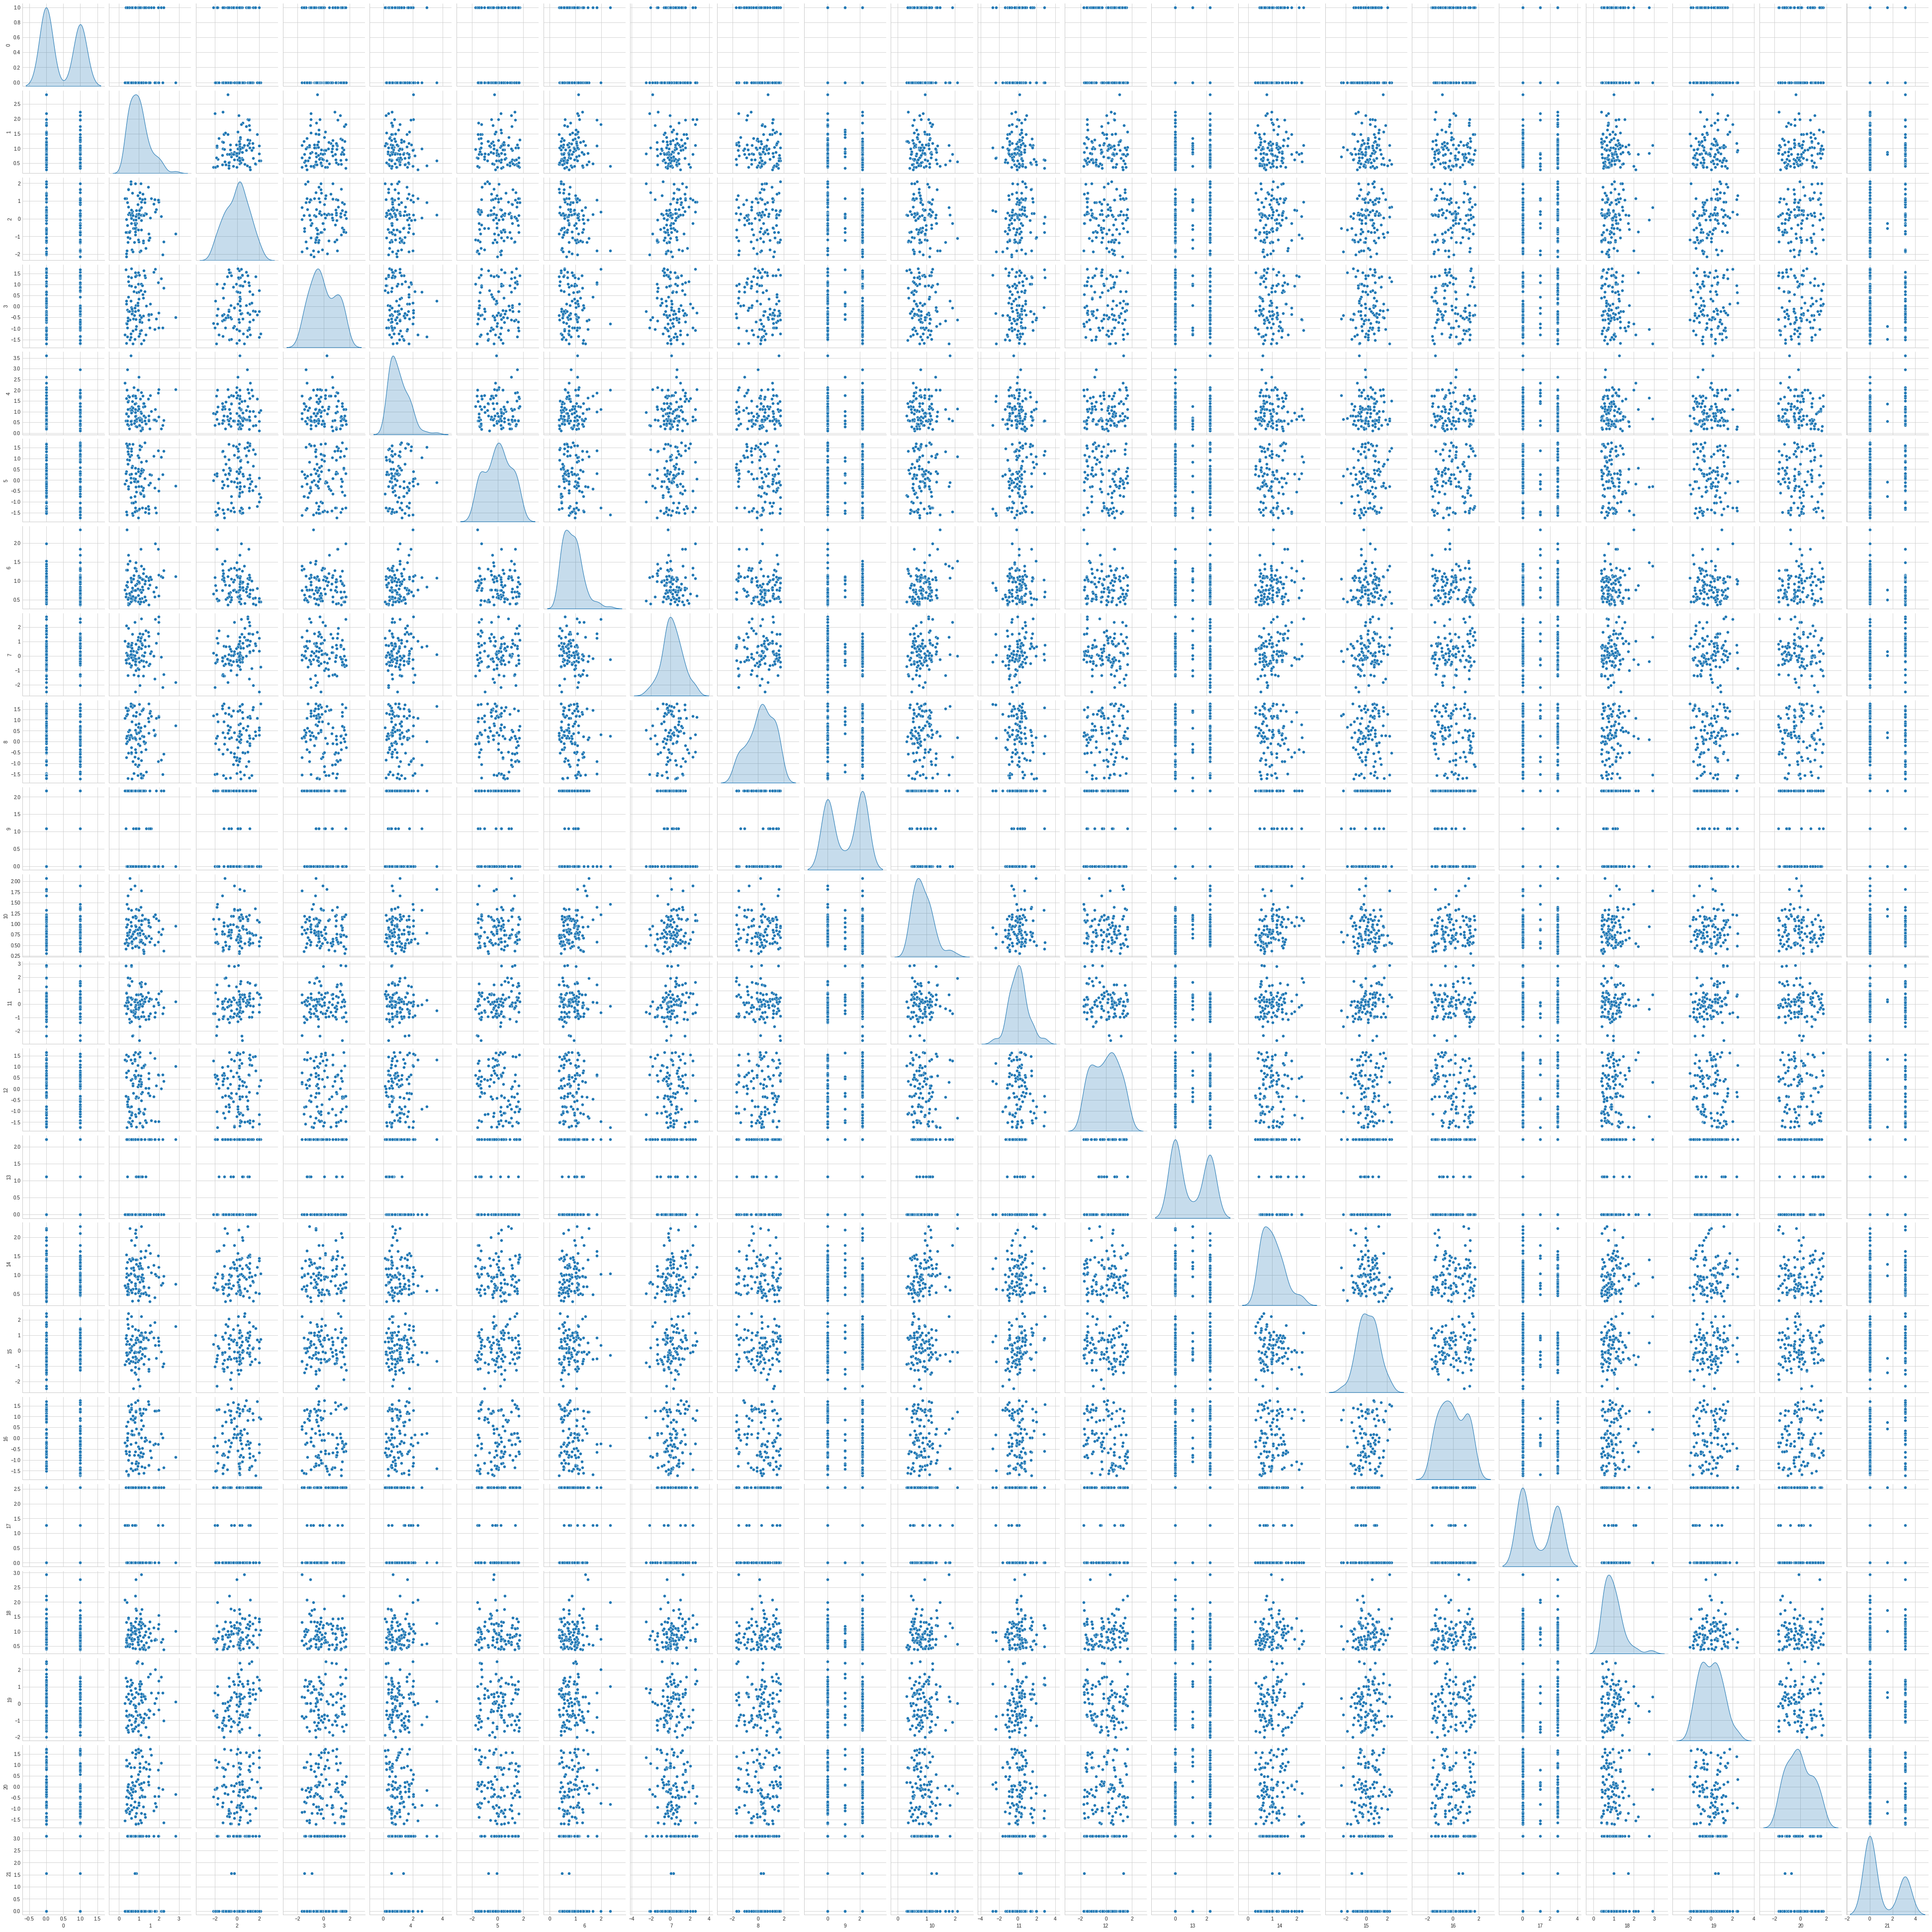

In [ ]:
# Plot it
sn.pairplot(pairPlotData, diag_kind="kde")

Next, let's split the data into features (x) and labels (y)

In [5]:
x = shortData.drop(shortData.columns[0],axis=1)
y = shortData[0]

print(x.head())
print(y.head())

               1         2         3   ...        19        20        21
1814828  0.458072 -0.248416  1.408655  ...  0.721597 -1.312634  0.000000
2118867  0.370593  0.966123  1.625050  ...  0.883165  0.583051  3.101961
1203429  1.586506 -1.425944 -1.658724  ... -1.084797  0.454312  0.000000
2079585  0.587825 -1.274005  1.142876  ... -1.249696  0.103052  0.000000
616804   1.475419 -0.592227 -0.606707  ...  0.161940  0.764507  0.000000

[5 rows x 21 columns]
1814828    0.0
2118867    0.0
1203429    0.0
2079585    0.0
616804     1.0
Name: 0, dtype: float64


Now, let's split the dataset `shortData` up into the training and testing sets.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=3
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4800000, 21)
(1200000, 21)
(4800000,)
(1200000,)


# **Classification** <a class="anchor" id="class"></a>

Now that we have our training and testing datasets, we can move ahead with building classifiers with it.

We can try building the following classifiers with sklearn, and plot their corresponding ROC curves.

- Logistic Regression
- K Nearest Neighbors
- Decision Tree
- Random Forest
- Naive Bayes Classifier
- Multi Layer Perceptrons
- AdaBoost


In [3]:
# Import time
from time import time

# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Import the metrics
from sklearn.metrics import precision_recall_curve, auc, roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Function to evaluate the model
def evaluate(clf, X, y):

  # Confusion matrix
  # Get Predictions
  y_pred = clf.predict(X)
  confMat = confusion_matrix(y, y_pred)

  # Calculate Values
  pr = precision_score(y, y_pred)
  rc = recall_score(y, y_pred)
  acc = accuracy_score(y, y_pred)

  # Print them
  print("Confusion Matrix:\n", confMat)
  print("Precision: ", pr)
  print("Recall: ", rc)
  print("Accuracy: ", acc)

  # Plot the matrix
  sn.heatmap(confMat, cmap="Blues", annot=True)
  plt.show()

  print("-------------------------------------------------------------")

  # ROC - AUC
  # Get the probabilities
  y_predict_proba = clf.predict_proba(X)[:, 1]

  # Calculate the values
  precision, recall, thresholds = precision_recall_curve(y, y_predict_proba)
  fpr, tpr, thresholds = roc_curve(y, y_predict_proba)

  # Plot the curve
  plot_roc_curve(clf, X, y)
  plt.show()

  # Print values of area under the ROC and PR curves
  print('ROC AUC', auc(fpr, tpr), '\n', 'PR AUC', auc(recall, precision))

## **Logistic Regression** <a class="anchor" id="reg"></a>

Confusion Matrix:
 [[4721 6525]
 [3875 8879]]
Precision:  0.5764087250064919
Recall:  0.6961737494119492
Accuracy:  0.5666666666666667


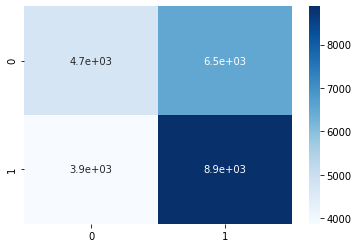

-------------------------------------------------------------


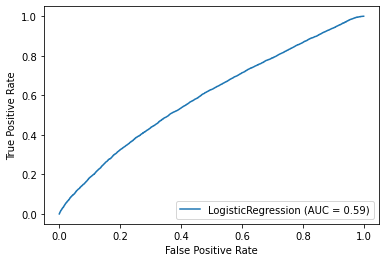

ROC AUC 0.594064766142976 
 PR AUC 0.6202330766696245
Execution took  1.2451484203338623 s


In [24]:
t1 = time()
# Create model
clf = LogisticRegression()
# Train it
clf.fit(x_train, y_train)
# Evaluate it
evaluate(clf, x_test, y_test)
print("Execution took ", time()-t1, "s")

From this, we can see that logistic regression performs *slightly* better than random.

## **K-Nearest Neighbours** <a class="anchor" id="knn"></a>

Confusion Matrix:
 [[5656 5590]
 [4296 8458]]
Precision:  0.6020785876993167
Recall:  0.6631644974125764
Accuracy:  0.5880833333333333


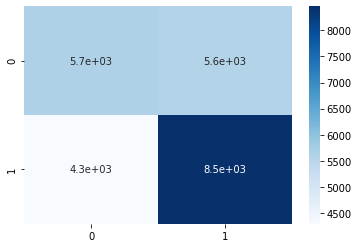

-------------------------------------------------------------


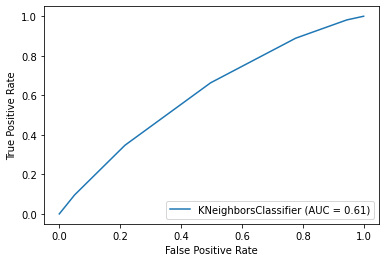

ROC AUC 0.6101635119385643 
 PR AUC 0.6379985511502878
Execution took  774.771154165268 s


In [26]:
t1 = time()
# Create model
clf = KNeighborsClassifier(5)
# Train it
clf.fit(x_train, y_train)
# Evaluate it
evaluate(clf, x_test, y_test)
print("Execution took ", time()-t1, "s")

From this, we can see that the KNN classification method too, does not fare much better than random guessing.

## **Decision Tree** <a class="anchor" id="dt"></a>

Confusion Matrix:
 [[6299 4947]
 [4372 8382]]
Precision:  0.6288543776727437
Recall:  0.6572055825623334
Accuracy:  0.6117083333333333


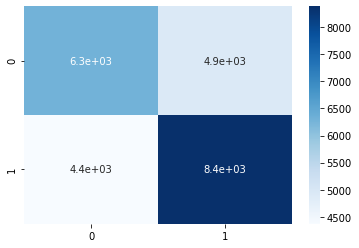

-------------------------------------------------------------


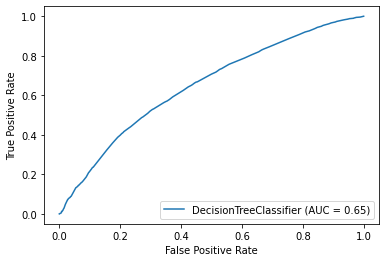

ROC AUC 0.6494379957750419 
 PR AUC 0.6533941050833969
Execution took  2.678687572479248 s


In [25]:
t1 = time()
# Create model
clf = DecisionTreeClassifier(max_depth=10)
# Train it
clf.fit(x_train, y_train)
# Evaluate it
evaluate(clf, x_test, y_test)
print("Execution took ", time()-t1, "s")

From this, we can see that a Decision Tree (with a depth of 10) also only performs slightly better than random guessing, but does much better than the Logistic Regression and KNNs.

## **Random Forest**<a class="anchor" id="rf"></a>


Confusion Matrix:
 [[5909 5337]
 [3775 8979]]
Precision:  0.627200335289187
Recall:  0.7040144268464795
Accuracy:  0.6203333333333333


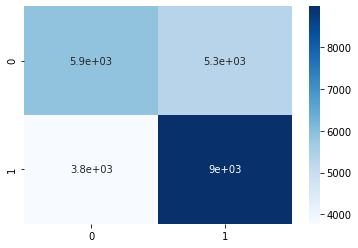

-------------------------------------------------------------


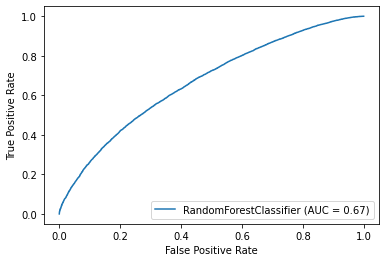

ROC AUC 0.6683998681907245 
 PR AUC 0.6887949197787688
Execution took  6.956610441207886 s


In [27]:
t1 = time()
# Create model
clf = RandomForestClassifier(max_depth=15, n_estimators=15, max_features='auto')
# Train it
clf.fit(x_train, y_train)
# Evaluate it
evaluate(clf, x_test, y_test)
print("Execution took ", time()-t1, "s")

From this, we can see that the Random Forest has performed the best so far, but it too isn't a great classifier, with an AUC of just 0.67.

## **Naive Bayes Classifier**<a class="anchor" id="nb"></a>

Confusion Matrix:
 [[3561 7685]
 [2854 9900]]
Precision:  0.5629798123400626
Recall:  0.776227066018504
Accuracy:  0.560875


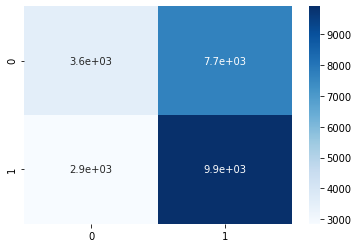

-------------------------------------------------------------


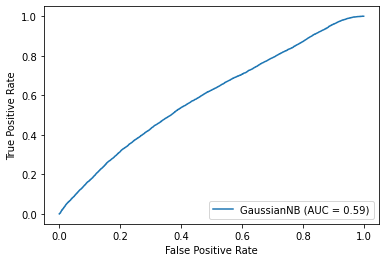

ROC AUC 0.5926038246944444 
 PR AUC 0.610965947063866
Execution took  0.5450377464294434 s


In [28]:
t1 = time()
# Create model
clf = GaussianNB()
# Train it
clf.fit(x_train, y_train)
# Evaluate it
evaluate(clf, x_test, y_test)
print("Execution took ", time()-t1, "s")

This classifier also performs poorly with the task at hand.

## **Multi Layer Perceptron**<a class="anchor" id="mlp"></a>

Confusion Matrix:
 [[7525 3721]
 [4919 7835]]
Precision:  0.6780027691242645
Recall:  0.6143170769954525
Accuracy:  0.64


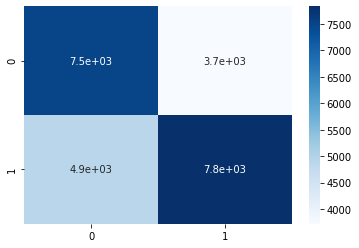

-------------------------------------------------------------


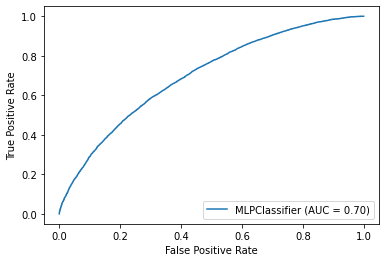

ROC AUC 0.7006138903227133 
 PR AUC 0.7125871079815211
Execution took  85.41898965835571 s


In [29]:
t1 = time()
# Create model
clf = MLPClassifier(max_iter=1000)
# Train it
clf.fit(x_train, y_train)
# Evaluate it
evaluate(clf, x_test, y_test)
print("Execution took ", time()-t1, "s")

So far, this classifier has performed the best.

## **AdaBoost**<a class="anchor" id="ada"></a>


Confusion Matrix:
 [[4603 6643]
 [3436 9318]]
Precision:  0.5837980076436313
Recall:  0.7305943233495374
Accuracy:  0.5800416666666667


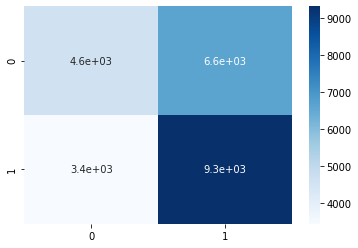

-------------------------------------------------------------


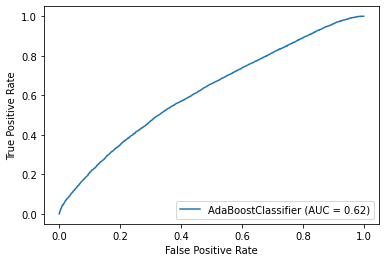

ROC AUC 0.6188446185218303 
 PR AUC 0.6453742539270508
Execution took  13.581999063491821 s


In [30]:
t1 = time()
# Create model
clf = AdaBoostClassifier()
# Train it
clf.fit(x_train, y_train)
# Evaluate it
evaluate(clf, x_test, y_test)
print("Execution took ", time()-t1, "s")

AdaBoost too has not performed well on the data.

## **Conclusion** <a class="anchor" id="sum"></a>

Summary of all the model's performances:

1. Logistic Regression
```
Precision:  0.5764087250064919
Recall:  0.6961737494119492
Accuracy:  0.5666666666666667
ROC AUC 0.594064766142976 
 PR AUC 0.6202330766696245
```
2. K-Nearest Neighbours
```
Precision:  0.6020785876993167
Recall:  0.6631644974125764
Accuracy:  0.5880833333333333
ROC AUC 0.6101635119385643 
 PR AUC 0.6379985511502878
```
3. Decision Tree
```
Precision:  0.6288543776727437
Recall:  0.6572055825623334
Accuracy:  0.6117083333333333
ROC AUC 0.6494379957750419 
 PR AUC 0.6533941050833969
```
4. Random Forest
```
Precision:  0.627200335289187
Recall:  0.7040144268464795
Accuracy:  0.6203333333333333
ROC AUC 0.6683998681907245 
 PR AUC 0.6887949197787688
```
5. Naive Bayes Classifier
```
Precision:  0.5629798123400626
Recall:  0.776227066018504
Accuracy:  0.560875
ROC AUC 0.5926038246944444 
 PR AUC 0.610965947063866
```
6. Multi Layer Perceptron
```
Precision:  0.6780027691242645
Recall:  0.6143170769954525
Accuracy:  0.64
ROC AUC 0.7006138903227133 
 PR AUC 0.7125871079815211
```
7. AdaBoost
```
Precision:  0.5837980076436313
Recall:  0.7305943233495374
Accuracy:  0.5800416666666667
ROC AUC 0.6188446185218303 
 PR AUC 0.6453742539270508
```

From this, we can conclude that the Multi Layer Perceptron performed the best of the 7 classifiers tested.

## **Future Work** <a class="anchor" id="fut"></a>

So far, we've only used scikit learn's inbuilt classifiers for the task, on a very limited portion of the dataset. From this, we could clearly see that it was the multi-layer perceptron that performed the best on this limited dataset. So, the next natural steps are:

- Build a feed-forward network in a deep-learning framework (TensorFlow / Keras).
- Use larger versions of the dataset.
- From the plot of all columns, it seems like we could replace a few columns (9, 13, 17, 21) with one-hot encodings which map their values to a simpler input. 
- We can try training the models on scaled data which lies within the [0, 1] range.

# **Dimensionality Reduction** <a class="anchor" id="rdn"></a>

Next, we look at dimensionality reduction techniques which we can apply on the dataset.

To see if this works properly, we'll be testing the reduced dataset with the Multi Layer Perceptron from above.

From what we had seen in the "Understanding the Dataset" phase, it is evident that we cannot apply the following techniques:

1. Low Variance Filter
2. High Correlation Filter

Also, given that the Random Forest model demonstrated a mediocre performance, it doesn't make much sense to use it for feature selection and subsequent reduction.

Hence, we go for the following technique instead

- Principal Component Analysis
- Neural Auto Encoder

## **PCA** <a class="anchor" id="pca"></a>

First, we bring all the features onto the same scale.

In [54]:
import numpy as np
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_std =  sc.fit_transform(x) # x is the full shortData's indepent features

# Print the covariance matrix once, before we proceed
cov_matrix = np.cov(x_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (21, 21)
Covariance_matrix [[ 1.00000833e+00  5.72030784e-04  7.63847401e-04 -1.42197220e-01
   3.15669967e-03  1.63546774e-01 -4.01262825e-03 -9.72087201e-04
  -8.27160766e-03  2.87064714e-03 -3.86642628e-04  8.84698954e-04
  -4.68132504e-03 -9.94146128e-03  2.74567398e-03 -5.72972061e-03
   6.33101142e-03 -1.45760538e-02  1.91428549e-03 -4.42067671e-03
   6.65140244e-03]
 [ 5.72030784e-04  1.00000833e+00 -1.85103975e-03  1.76482840e-04
  -2.96255955e-03 -1.02624404e-03  2.65643483e-01  2.13501578e-04
   1.49889706e-03 -2.76653743e-03  2.63176356e-01  1.72879252e-03
   1.63938412e-03 -1.02865621e-03  2.26266395e-01  1.70148417e-03
   3.15235091e-03 -3.02524902e-03  1.78611323e-01 -8.99279434e-04
  -5.75251370e-03]
 [ 7.63847401e-04 -1.85103975e-03  1.00000833e+00  1.64696313e-03
  -4.74863000e-02  4.20335977e-03 -2.93895937e-03 -1.68808115e-01
  -7.83559471e-04  2.96745028e-03 -3.07945052e-03 -9.01104199e-02
  -1.16239825e-03  4.05536825e-03 -3.30455942e-03 -8.461321

Next, we calculate the eigenvectors and eigenvalues, and sort them in descending order.


In [55]:
# Calculate
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors:\n', eigenvectors)
print('Eigen Values:\n', eigenvalues)

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
# Sort them
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Print it out to see if it worked properly
print('Eigenvalues in descending order:\n', eigvalues_sorted)

Eigen Vectors:
 [[ 6.04309744e-02  2.03796851e-03  4.72527718e-03 -2.56018776e-01
   6.11150229e-03  8.70644837e-02 -4.12893117e-02 -3.62921846e-02
   1.46877603e-01  6.05441869e-02  3.48462460e-01  5.51107158e-02
   1.03620874e-03 -1.09523728e-03  1.57785117e-02 -5.04787226e-01
  -7.14191488e-01  2.36965963e-02 -4.00857078e-02 -5.58106993e-02
  -4.52823070e-03]
 [-1.31487458e-02  4.81284651e-01 -6.89608343e-04  3.01891157e-03
  -4.33148092e-03  5.45749064e-03  5.30895698e-03  4.99051061e-03
   6.16583094e-03  7.31684733e-03  1.20284157e-01 -7.83293607e-01
  -1.60505762e-01 -3.00665445e-01 -1.53394338e-01 -1.26079220e-02
   4.83429831e-03 -9.12901893e-04 -6.04170138e-03  7.50511720e-03
   2.15369205e-03]
 [ 8.31138770e-03 -6.93260905e-03 -1.39617902e-03 -1.40122801e-02
  -3.97028937e-01 -3.43489688e-03 -8.49782914e-03 -3.36263020e-03
  -1.18112806e-01  2.55817482e-01 -3.20530652e-03  6.97733351e-03
   6.03461890e-03 -3.88262782e-03 -1.02202515e-02 -1.38281747e-03
  -2.40045820e-02 -2.1

Now, let's plot this.

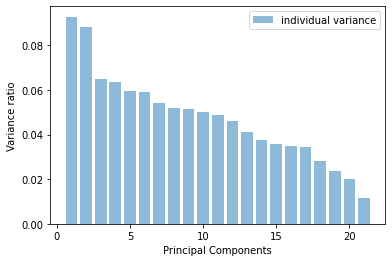

In [64]:
# The sum of all eigenvalues
tot = sum(eigenvalues)

# Variance explained by each eigenvector
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
# Cumulative variance
cum_var_exp = np.cumsum(var_explained)

plt.bar(range(1,22), var_explained, alpha=0.5, align='center', label='individual variance')
plt.ylabel('Variance ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.show()

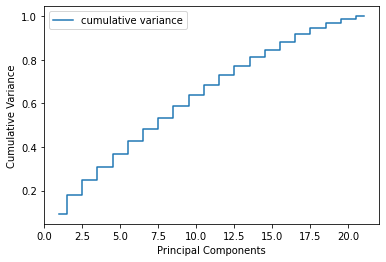

In [69]:
plt.step(range(1,22),cum_var_exp, where= 'mid', label='cumulative variance')
plt.ylabel('Cumulative Variance')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.show()

In [70]:
print(var_explained)
print(cum_var_exp)

[0.0928967587944701, 0.08847826356046178, 0.06499105995127502, 0.0637789851553863, 0.05951171025919385, 0.05917776562355454, 0.054305132405477886, 0.051991858606753205, 0.05147027774754206, 0.05028582641518932, 0.04889885962681655, 0.04607425761488572, 0.041328443570107454, 0.037790530032262855, 0.035815853554754536, 0.034790125557729826, 0.034666584113383365, 0.02825036408835929, 0.02357495696943658, 0.020218511226198, 0.011703875126761978]
[0.09289676 0.18137502 0.24636608 0.31014507 0.36965678 0.42883454
 0.48313968 0.53513153 0.58660181 0.63688764 0.6857865  0.73186076
 0.7731892  0.81097973 0.84679558 0.88158571 0.91625229 0.94450266
 0.96807761 0.98829612 1.        ]


From this, we can see that the last 5 dimensions seem to have the least impact on the variance of the dataset (the remaining 16 contribute towards almost 90% of the variance).

Hence, we'll get rid of them, and rebuild the classifier on this to see the effects of this reduction on its performance.

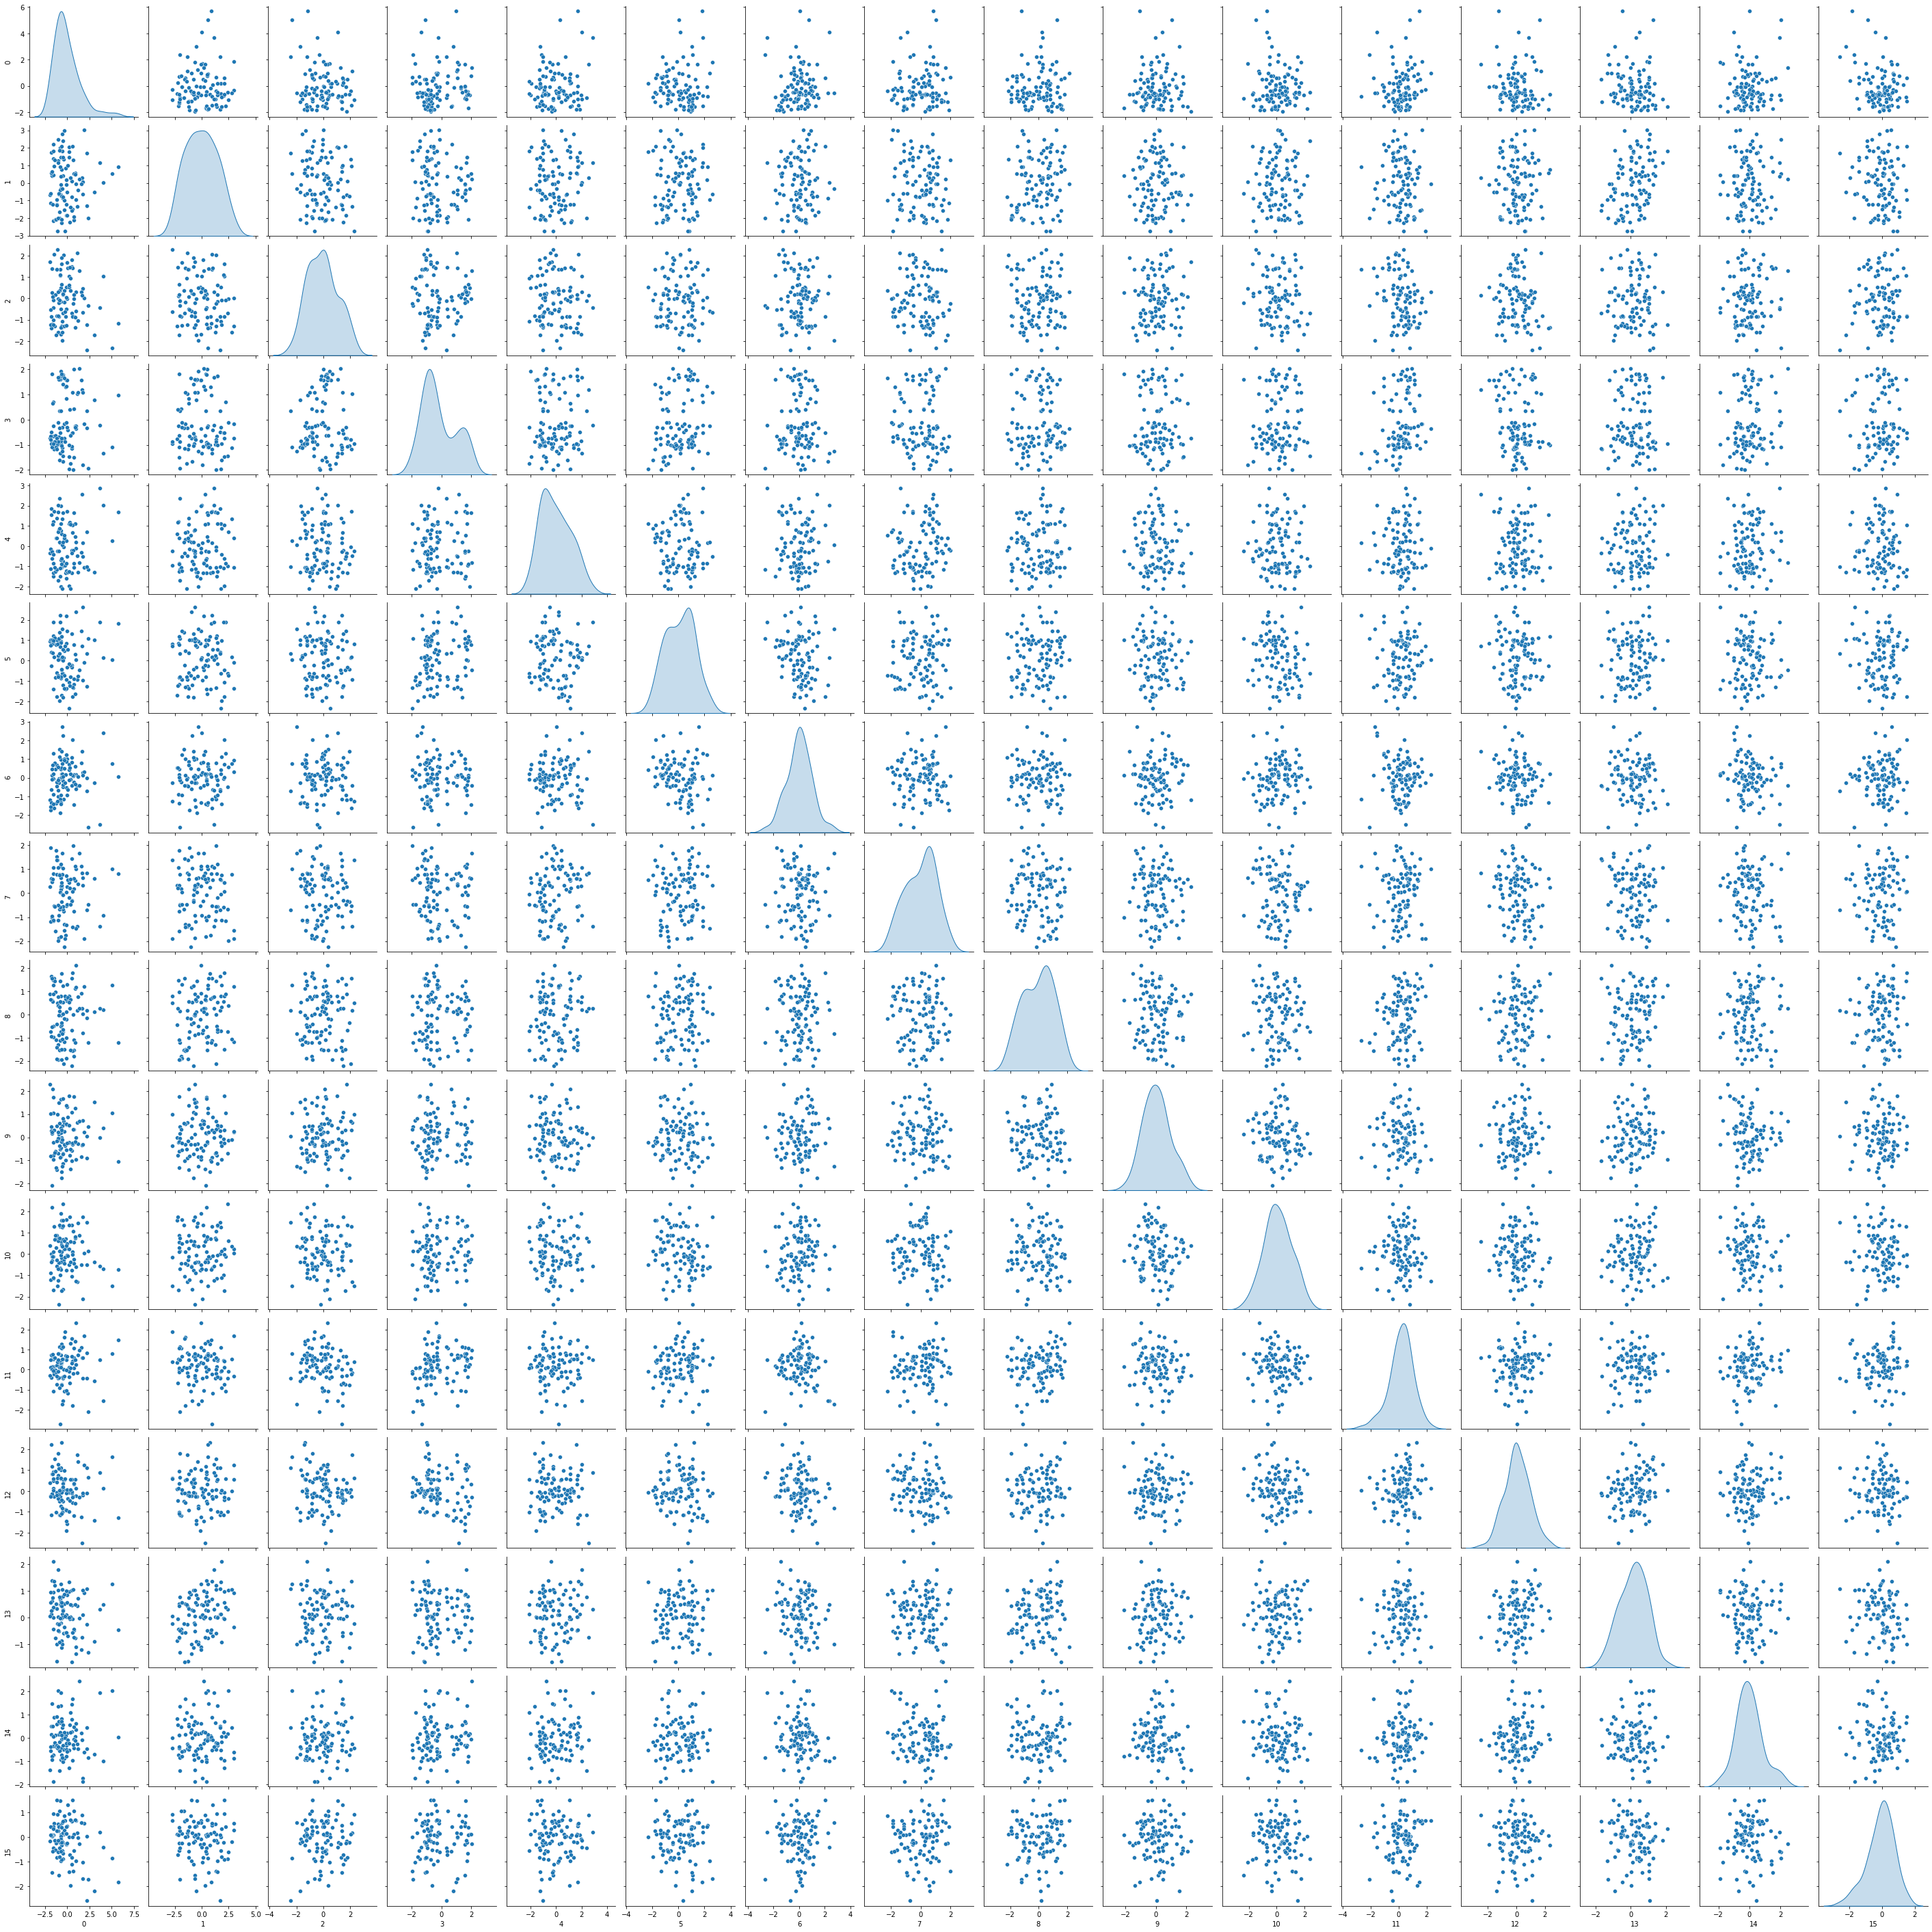

In [76]:
# p_reduce represents reduced mathematical space
p_reduce = np.array(eigvectors_sorted[0:16])   # Reducing from 21 to 16 dimension space
x_16D = np.dot(x_std,p_reduce.T)   # projecting original data into principal component dimensions
pairplot_16D = pd.DataFrame(x_16D).sample(100)  # converting array to dataframe for pairplot

# Pairplot
sn.pairplot(pairplot_16D, diag_kind="kde")
plt.show()

Now, let's train the MLP classifier again on this data, to see what kind of impact it has on it's accuracy and performance.

(96000, 16)
(24000, 16)
(96000,)
(24000,)
Confusion Matrix:
 [[6230 5016]
 [3856 8898]]
Precision:  0.6394997843898232
Recall:  0.6976634781245099
Accuracy:  0.6303333333333333


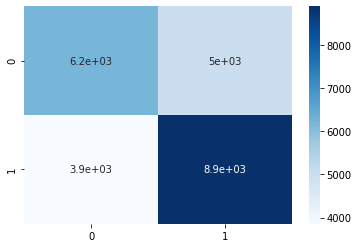

-------------------------------------------------------------


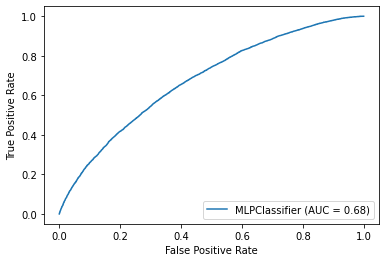

ROC AUC 0.6776320671687397 
 PR AUC 0.6876381037450132
Execution took  136.37257933616638 s


In [77]:
t1 = time()

# Split dataset for train and test
x_16D_train, x_16D_test, y_train, y_test = train_test_split(
    x_16D, y, test_size=0.2, random_state=3
)

print(x_16D_train.shape)
print(x_16D_test.shape)
print(y_train.shape)
print(y_test.shape)


# Create model
clf = MLPClassifier(max_iter=1000)
# Train it
clf.fit(x_16D_train, y_train)
# Evaluate it
evaluate(clf, x_16D_test, y_test)
print("Execution took ", time()-t1, "s")

MLP's performance on original data, before reduction:
```
Precision:  0.6780027691242645
Recall:  0.6143170769954525
Accuracy:  0.64
ROC AUC 0.7006138903227133 
 PR AUC 0.7125871079815211
```
MLP's performance on data reduced by 5 dimensions:
```
Precision:  0.6394997843898232
Recall:  0.6976634781245099
Accuracy:  0.6303333333333333
ROC AUC 0.6776320671687397 
 PR AUC 0.6876381037450132
```

From this, we can see that despite a reduction of 23.8095 % from the original dataset, the accuracy of the classifier has not decreased by much.

## **Neural Auto Encoder** 

As autoencoders tend to perform better with more training data, we'll be using the full dataset here. After that, we'll use a small sample (120k rows) from it for training the classifier to validate the network.

In [6]:
# Get full data
full_data = df

# Drop last 7 columns
full_data = full_data.drop(full_data.columns[28],axis=1)
full_data = full_data.drop(full_data.columns[27],axis=1)
full_data = full_data.drop(full_data.columns[26],axis=1)
full_data = full_data.drop(full_data.columns[25],axis=1)
full_data = full_data.drop(full_data.columns[24],axis=1)
full_data = full_data.drop(full_data.columns[23],axis=1)
full_data = full_data.drop(full_data.columns[22],axis=1)

# Normalise all data
full_data = full_data.apply(lambda x: (x-x.min())/(x.max()-x.min()))

# Split into features and lables
x = full_data.drop(full_data.columns[0],axis=1)
y = full_data[0]

print(x.shape)
print(y.shape)

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=3
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6000000, 21)
(6000000,)
(4800000, 21)
(1200000, 21)
(4800000,)
(1200000,)


Next, let's build an autoencoder to train on this data

In [8]:
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Input
from keras import optimizers, regularizers

Epoch 1/5
4800/4800 [==============================] - 12s 2ms/step - loss: 0.4382
Epoch 2/5
4800/4800 [==============================] - 11s 2ms/step - loss: 0.3729
Epoch 3/5
4800/4800 [==============================] - 11s 2ms/step - loss: 0.3725
Epoch 4/5
4800/4800 [==============================] - 11s 2ms/step - loss: 0.3725
Epoch 5/5
4800/4800 [==============================] - 11s 2ms/step - loss: 0.3725


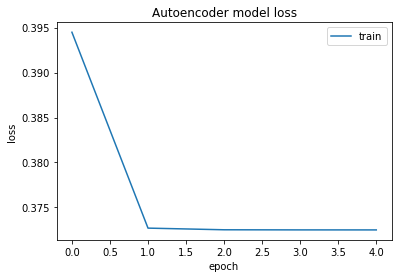

In [9]:
encoding_dim = 16

# Define input layer
input_data = Input(shape=(x_train.shape[1],))

# Define encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_data)

# Define decoding layer
decoded = Dense(x_train.shape[1], activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_data, decoded)

#Compile the autoencoder model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

#Fit to train set, validate with dev set and save to hist_auto for plotting purposes
ae = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=1000,
                shuffle=True
)

# Summarize history for loss
plt.figure()
plt.plot(ae.history['loss'])
plt.title('Autoencoder model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
encoder = Model(input_data, encoded)

# Create a placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Next, we build a new model which takes this data as input.

In [10]:
# Encode data set from above using the encoder
encoded_train_x = encoder.predict(x_train)
encoded_test_x = encoder.predict(x_test)

model = Sequential()
model.add(Dense(16, input_dim=encoded_train_x.shape[1],
                kernel_initializer='normal',
                activation="relu"
                )
          )
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')

Epoch 1/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.6877 - val_loss: 0.6842
Epoch 2/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.6852 - val_loss: 0.6838
Epoch 3/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.6836 - val_loss: 0.6814
Epoch 4/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.6831 - val_loss: 0.6814
Epoch 5/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.6827 - val_loss: 0.6804
Epoch 6/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.6824 - val_loss: 0.6795
Epoch 7/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.6824 - val_loss: 0.6799
Epoch 8/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.6823 - val_loss: 0.6799
Epoch 9/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.6821 - val_loss: 0.6801
Epoch 10/10
60000/60000 [==============================

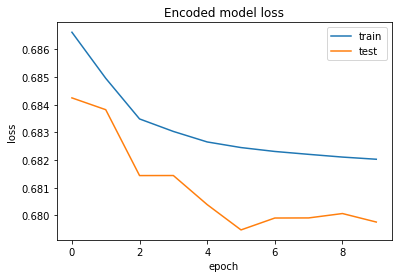

In [115]:
history = model.fit(encoded_train_x, y_train, validation_split=0.2, epochs=10, batch_size=1000)

# Summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Encoded model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Now, we visualise the new classifier's performance.

Overall accuracy: 0.5582266666666666


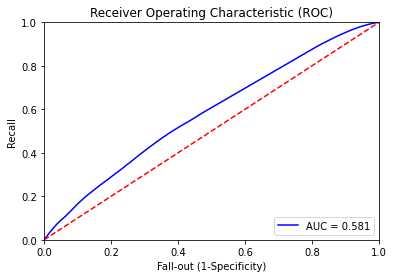

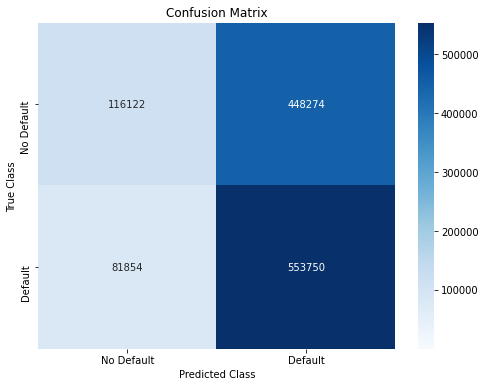

In [118]:
# Predict on test set
predictions_NN_prob = model.predict(encoded_test_x)
predictions_NN_prob = predictions_NN_prob[:,0]

# Turn probability to 0-1 binary output
predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) 

# Accuracy
acc_NN = accuracy_score(y_test, predictions_NN_01)
print('Overall accuracy:', acc_NN)

# Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, predictions_NN_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sn.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

From the above graphs, we can see that the classifier we had built to work with the autoencoder performs poorly at the classification task. This can be attributed to two reasons:
1. The autoencoder we built was a very simple one, so maybe it was unable to capture all the required features comprehensively.
2. The classifier we built is also very basic, and hence it could not perform as well as a deeper classifier could have.

We can figure out which of the two reasons is more likely to be the contributing factor through means of a simple test.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Confusion Matrix:
 [[341119 223277]
 [233144 402460]]
Precision:  0.643177565015334
Recall:  0.6331929943801486
Accuracy:  0.6196491666666667


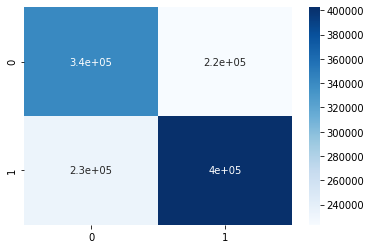

-------------------------------------------------------------


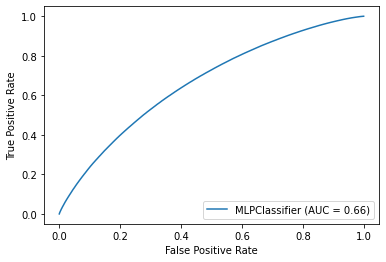

ROC AUC 0.6635604206843982 
 PR AUC 0.6707186585465506
Execution took  4981.915852546692 s


In [11]:
# Use sklearn's mlp to figure out which of the above is the more likely reason
t1 = time()
# Create model
clf = MLPClassifier(max_iter=100, verbose=True)
# Train it using the autoencoder's encodings
clf.fit(encoded_train_x, y_train)
# Evaluate it
evaluate(clf, encoded_test_x, y_test)
print("Execution took ", time()-t1, "s")

Let's compare all three versions of the MLP network:

1. Normal MLP's performance
```
Precision:  0.6780027691242645
Recall:  0.6143170769954525
Accuracy:  0.64
ROC AUC 0.7006138903227133 
 PR AUC 0.7125871079815211
```
2. MLP's performance on PCA reduced data:
```
Precision:  0.6394997843898232
Recall:  0.6976634781245099
Accuracy:  0.6303333333333333
ROC AUC 0.6776320671687397 
 PR AUC 0.6876381037450132
```

3. MLP on AE reduced data:
```
Precision:  0.643177565015334
Recall:  0.6331929943801486
Accuracy:  0.6196491666666667
ROC AUC 0.6635604206843982 
 PR AUC 0.6707186585465506
```

From this, we can infer that the basic Auto Encoder performs reasonably well, with results comparable to that from PCA.

## **Future Work** <a class="anchor" id="fut1"></a>
We've used PCA and an Auto Encoder for dimensionality reduction, and it has performed reasonably well. The next natural steps would be to

1. Perform LDA, as another dimensionality reduction technique.
2. Perform PCA on the latent vector from the Deep Autoencoder to further reduce the dimensionality of the task at hand.
3. Build better Auto Encoders for the task.
4. Run on an instance with more RAM. During training, the instance crashed multiple times due to which we had to stop at just 5 epochs.
5. Use better classifiers to benchmark the AutoEncoder.

# **Concluding Thoughts**

For the major part of this exercise, we were only working with 21 of the 28 provided columns. Also, we built our classifiers for Part A on an even smaller sample set from the provided data. With this in mind, these were our findings:

## Observations :

1. A multi-layer perceptron performed the best at the classification task.
2. PCA provided 23% reduction by eliminating 5 columns, without having a significant impact on the Multi Layer Perceptron's performance.
3. The AutoEncoder's performance is comparable to that offered through PCA.

## Inferences :

1. Since the MLP performed the best, the next logical thing to do is to build better deep neural networks using frameworks like TensorFlow or PyTorch.
2. PCA can be used as a dimensionality reduction technique.
3. The AutoEncoder's performance can be improved by using better networks.

## Future work :

1. Try LDA and see how it compares to PCA for dimensionality reduction.
2. Build better classifiers to benchmark the effects of dimensionality reduction.
3. Build better Auto Encoders to achieve better dimensionality reduction.
4. Try replacing the columns 9, 13, 17 and 21 with one-hot encodings and evaluate the impact it has on models.
5. Use scaled data on all classifiers, instead of just for dimensionality reduction.
